## Feature Engineering Important functions (186)

- Checking Missing Values at first stage to confimr which feature is having missing values:  df.isnull.().sum()
- Dropping entire row which has missing values will result in dropping a huge amount of data, which may result in loosing a lot amount of data. We should not go with this method: df.dropna()
- Checking the shape of the dataset: df.shape
- Column wise deletion will help to delete a column which has a lot of nan values: df.dropna(axis=1, inplace=True)

## Imputation Missing Values

1- Mean Value Imputation
- Mean Imputation Works well when we have normally distributed data. If the feature is somehow a normally distributed and has nan values, the mean value imputation helps the column to make it fully normal distributed feature.
- Replacing the null values with the mean value of that particular column. We make a new column to save the new records we created: df['newFeature'] = df['feature'].fillna(df['feature'].mean())
Then, we check the new feature values with the previous values: df[['newFeature','age']]

2- Median Value Imputation
- If we have outliers in the dataset, like, if the dataset or particular feature is left skewed or right skewed, we know that the chances are high that outliers exists. In that case, if nan value exist, we can replace those nan values with Median Value Imputation: df['newFeature'] = df['feature'].fillna(df['feature'].median())
Then, we check the new feature values with the previous values: df[['newFeature','age']]

3- Mode Imputation Technique-- Works with Categorical Values
- If a particular feature values are categorical, in other words, objects and if nan value exists, we use Mode Imputation Technique.
- Checking the nan categorical value: df[df['embarked'].isnull()]
- Checking to confirm if we are dealing with categorical values: df['feature'].unique()
- doing the Mode Imputation and storing it in a new feature: newFeature = df[df['feature'].notna()]['feature'].mode()[0]
- Filling the mode value: df['feature_mode'] = df['feature'].fillna(mode_value)
- Comparing the previus value with the updated value: df[['feature_mode', 'feature']]


## Feature Engineering (Handling Imbalance Dataset) (187)

- For example, working with a dataset solving a classification problem, we know the outputs are in categories. Having two category is known as Binary classification problem. Lets say, we have 1000 of data points. The output feature is a binary classification problem. The outputs are either 'yes' or 'no'. I have 900 yes value and 100 no value. The ratio is 9:1. This is known as an imbalance Dataset.
- The problem we will face while predicting in ML is, we will get biased towards the maximum number of the datapoints. We need to fix this issue by balancing the dataset using the below discussed techniques:

1. Upsampling: We try to increase the minority number of the data points.
- We check the number of value counts of the categorical outfeature by: df['target'].value_count()
- Increasing the number of minimum values (which is 100 no): df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

from sklearn.utils import resample
df_minority_upsampled = (df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

- Check the shape to confirm: df_minority_upsampled.shape
- Combining the new updated samples with the existing dataset: df_upsampled=pd.concat([df_majority,df_minority_upsampled])

2. Downsampling: We try to decrease the majority of the data points. It is not ideal to do as we wil loose alot of data. The steps are same as minority upsampled. We just rename the name:

df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )
        
df_majority_downsampled.shape

df_downsampled=pd.concat([df_minority,df_majority_downsampled])

df_downsampled['target'].value_counts()

## Feature Engineering (SMOTE) (188)

# SMOTE(Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

For example, lets say we have 900 output of a category as majority instances and 100 output of another category as minority instances. In the upsampling technique, we increase the minority datapoints to make it equal to the majority dataset. What happens is, the points get increased in the same position again and again. By this, the variance of the datapoints of minority instances are not happening.

To avoid this problem, we use the interpolating technique, where, it draws a line between two closed minor data points and creates the new instances between that line. By this, the spread of the datapoints gets equality. 

In [1]:
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

X.shape

(1000, 2)

In [2]:
len(y[y==1])

100

In [3]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [4]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

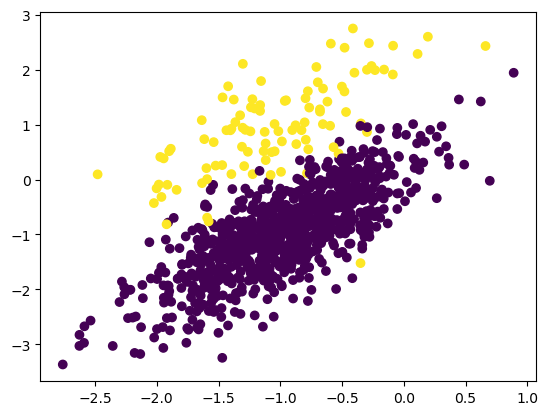

In [5]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [6]:
## Applying SMOTE

In [7]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 7.6 MB/s eta 0:00:00


In [8]:
from imblearn.over_sampling import SMOTE
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [9]:
X.shape

(1800, 2)

In [10]:
y.shape

(1800,)

In [11]:
len(y[y==0])

900

In [12]:
len(y[y==1])

900

In [13]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

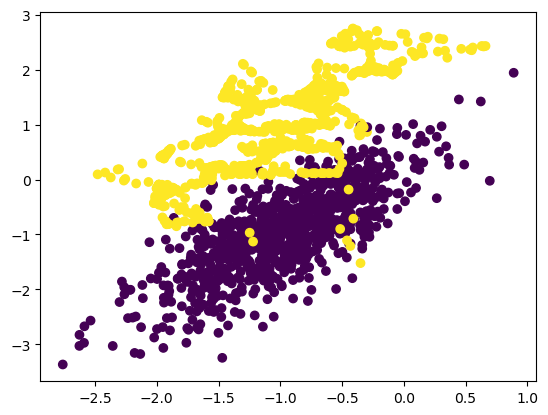

In [14]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

## Feature Engineering (Data Interpolation) (189)

Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas.

Lets say I have a dataset with some known values (10 data points lets assume) and I want to increase it to 100 within that specific dataset, then we have to interpolate those data points, create synthetic data points.

Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

## 1. Linear Interpolation

This works with respect to linear data

In [15]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

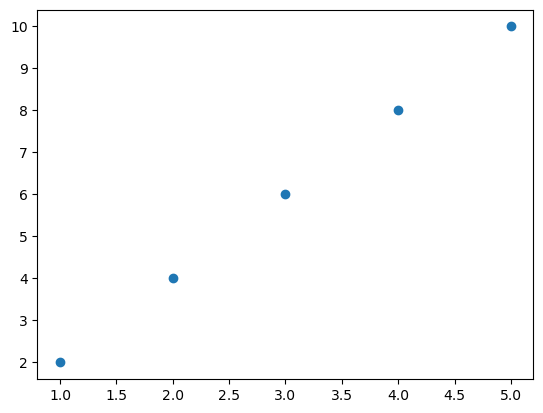

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [18]:
## interpolate the data using linear interpolation
x_new = np.linspace(1,5,10) ## create new x values
y_interp = np.interp(x_new,x,y)


In [19]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

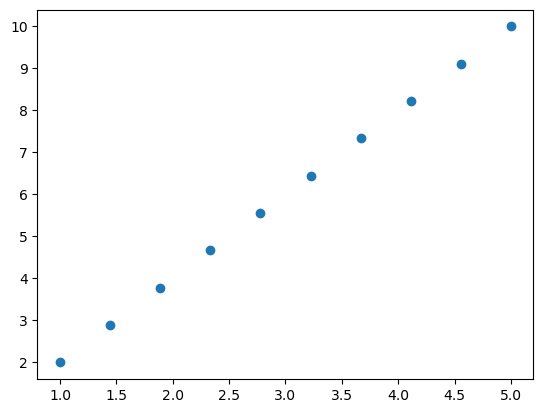

In [20]:
plt.scatter(x_new,y_interp)

# 2. Cubic Interpolation With Scipy

The dataset will be in some kind of curve shape

In [24]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])  ## The relation between x and y is in a cubic manner

In [25]:
from scipy.interpolate import interp1d

In [26]:
##create a cubic interpolation function
f=interp1d(x,y,kind='cubic')

In [28]:
# interpolate the data
x_new = np.linspace(1, 5, 10)
y_interp=f(x_new)

In [29]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

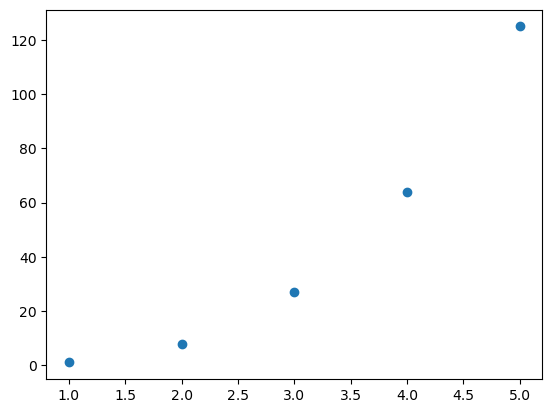

In [30]:
plt.scatter(x,y)

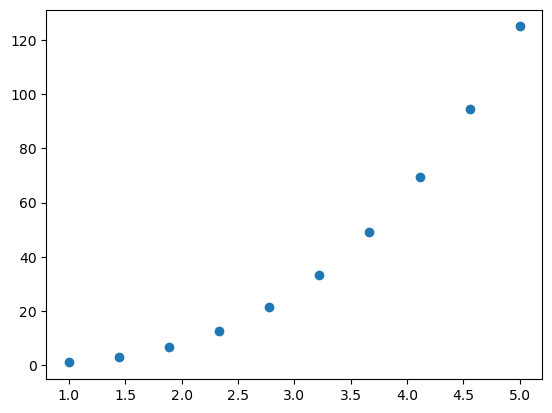

In [31]:
plt.scatter(x_new,y_interp)

# 3. Polynomial Interpolation

This is also used in a curve manner. We set a degree of polynominal (1,2,3, etc) to decide the curve to make. If it is 1, it becomes a linear line, if it is 2, it is an exponential line (curve) and so on.

In [32]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

In [33]:
# interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)

In [34]:
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.polyval(p, x_new) # interpolate y values

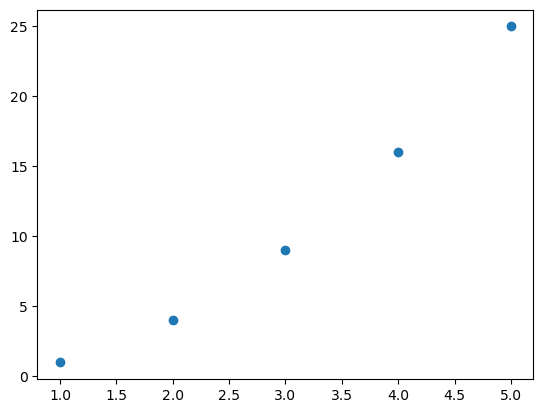

In [35]:
plt.scatter(x,y)

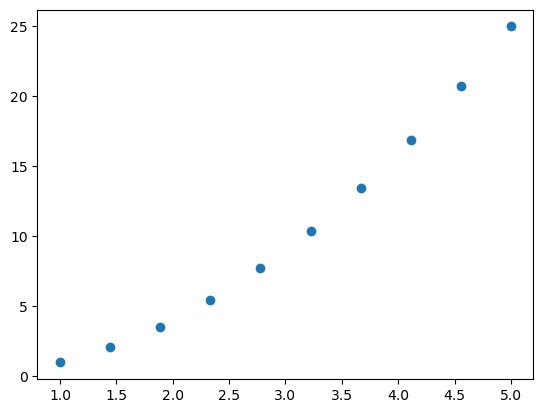

In [36]:
plt.scatter(x_new,y_interp)

## Feature Engineering (Percentiles & Quartiles) (190)

# Percentiles

* Definition: A percentile is a value below which a certain percentage of observations or data points lie. 

Example: Lets say I have number like X = {2,3,3,4,6,6,7,8,8,9,9,10,11,12}

I am asked what is 75% value in X. Lets assume 9 is the 75% value of X. It means that Below X=9, there are 75% of this entire distribution falling below 9. 75% of the entire distribution fall below the 75 percentile value. 

If we are asked, what is the percentile rank of 10: number of values below 10 * 100/ total size(n) = 80%
It says, 80% if entire distribution falls below the value 10.

If we are asked, what value exists at percentile 25?
value= percentile * (total value counts+1)/100 = index value of X

The index count starts from 1st index. There is no 0 index count.

* Quartiles:
Q1 - 25 percentile
Q2 - Median
Q3 - 75 percentile






## Feature Engineering (5 number Summery and Boxplot) (191)

This is super important to find outliers in a specific dataset. 

Discussion are below regarding 5 number summary:
1. Minimum
2. First Quartile (25 percentile Q1)
3. Median
4. Thrid Quartile (75 percentile Q3)
5. Maximum

* Removing the Outliers:

X = { 1,2,2,2,3,3,4,5,5,5,6,6,6,6,7,8,8,9,29 }

[Lower Fence <--------------> Higher Fence]

IQR = Q3 - Q1

Q1 = 25 percentile = 25 * (19 + 1) / 100    (n=19)
                   = 5th value = 3
                   
Q3 = 75 percentile = 75 * (19+1) / 100
                   15 the value = 7
            
IQR = Q3 - Q1 = 7 - 3 = 4    (IQR: Inter Quartile Range)

Lower Fence = Q1 - 1.5(IQR) = 3 - 1.5*4 = -3
Higher Fence = Q3 + 1.5(IQR) = 7 + 1.5*4 = 13

My lower fence and higher fence is between -3 to 13.

Anything below -3 and above 13 will be considered as outliers. So in X, the outlier is 29.

## Feature Engineering (Handling Outliers) (192)

In [1]:
## Minimum,MAximum,Median,Q1,Q3,IQR

In [2]:
import numpy as np

In [3]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [4]:
minimum,Q1,median,Q3,maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [5]:
IQR=Q3-Q1
print(IQR)

35.0


In [6]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [7]:
lower_fence

1.5

In [8]:
higher_fence

141.5

In [9]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

In [11]:
import seaborn as sns

<AxesSubplot: >

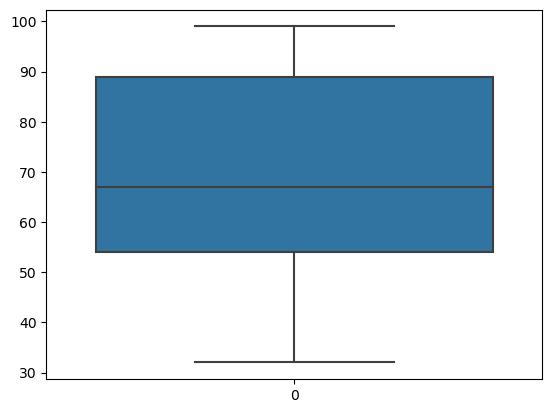

In [12]:
sns.boxplot(lst_marks)

In [13]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<AxesSubplot: >

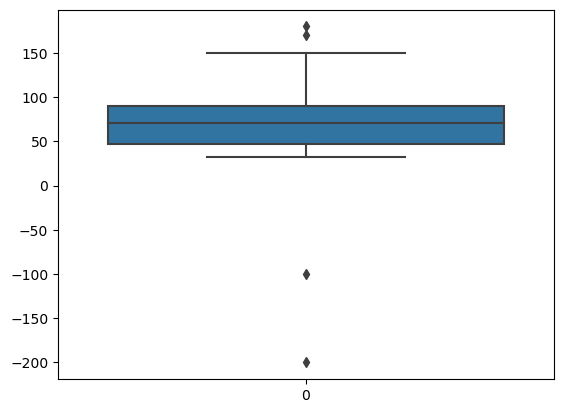

In [14]:
sns.boxplot(lst_marks)

## Feature Engineering (Filter Method, Wrapper Method, Embebbeded Method, Feature Selection, Recursive Feature Elimination, Backward Elimination, Forward Elimination will be pending...)
These are feature selection teqhniques. Lets say, we have 500 features in a dataset and want to select top 10 features. We use these techniques. Looking forwrad to learn with Grad Bunker.

## Feature Engineering (Feature Extraction) (194)

* Feature Extraction:  Is a process of selecting and extracting the most important features from RAW data.  
Lets say we want to develop an ML/DL application. Lets assume we have 1000 features in our dataset. We can train our data set with all the 1000 features. But it won't give us the best result. Like, it will take alot of taining time to predict, the model performance will decrease. What we should do is, we can pick up the most important features (20/30) out of these 1000 features to get the best result.

* Types of Feature Extraction:

1. Feature Scaling: 

Lets say in a particular dataset, we have 4 features named Age, Weight, Height and BMI(Target feature). All these features will have different units. Like, age is in form of year, Weight in kg and Height is in cm and so on. All these features will be measured in different units. 

There are some machine learning algorithms which works in distance metrics. Distance metrics basically means, lets say, i want to plot age and weight, and lets say i want to find out any algorithms which will look at the relation of these variables, in this kind of scenario what will happen is that, the distance between the points will get calculated in this scenario. While calculating the distance, the points value will be probably huge. Lets say, one point has the value of 32, 70 (age and weight). The very next point will have 28 and 75. Calculating the distance between these two points will take time. Imagine, if you have 500 feature in a dataset with millions of datapoints, how much time it will take to calculate the distance. There are many algorithms which uses distance metrix (Like KNN etc). 

To handle this kind of situation, we scale the data first in some smaller range. 

**The 1st technique we apply on feature scaling is: 

**STANDARDIZATION**--> As we know about Z-Score from Statistics, it helps us to know how many standard diviation of a specific value is away from the mean. If I want to take a specific feature and apply z-score on top of it, based on that features entire distribution, it will convert those values within some range based on the mean and the standard diviation. When we apply this formula in each and every distribution, we get mean=0 and SD=1, which is in short, STANDARD NORMAL DISTRIBUTION. This whole process is knows as STANDARDIZATION. *This technique is mostly used in ML Techniques.

**The 2nd technique we apply on feature scaling is: 

**NORMALIZATION**--> [ Min Max Scaler] Here we are transforming the values of the feature from 0-1. *This technique is specifically used in Deep learning Techniques, where the images are inputs.

**The 3rd technique we apply on feature scaling is: 

**UNIT VECTOR**--> This technique applies when we do feature scaling based on unit vector. Any vector that has magnitute of 1 is called as unit vector. 

Lets say, vector x = (3,4), which means, 3(feature1) unit movement to the right, there is a 4(feature2) unit movement in the verticalwise.

To know the magnitute of x, i have to calculate the Hypotenuse (the distance between 3 and 4), which will be 5. It is done by pythogerus theorum. 

To find out the unit vector (1), devide the each and every side by 5 and do the calculation by the formula. 
(3/5, 4/5)


2. Feature Selection:


We just pick the most important feature. 

500 features -------> Top 10 features->ML Model Train

**There are 3 major techniques to select the feature:

*1st technique is Filter Method: We have various ways. One way is to find out the correlation with respect to the important features. 

*2nd technique is Embedded Method: 

*3rd technique is Wrapper Method:



3. PCA (Principle Component Analysis): 

Lets say we have 2 features f1 and f2 (2 dimension points-2D), and an output. Now with respect to these 2 features, we can convert this 2D to 1D. This is what PCA does. Event if i have 1000D, i can convert this to 1D. But, there will be lose of of data. 

During the feature engineering, if we consider about 2 features in 2D, considering 1 feature in x-axis and 1 feature in y-axis, we draw a line from the data points till the x axis, where x and y is joining. We consider the points that joins in x axis and ignore the data points. This is how feature engineering done, we remove the y feature in this way. But, as we select the the x-axis points, there will be a chance that we lose alot amount of data which may have played an important role in prediction. This is where PCA plays an important role, where we do this 2D->1D, but there will be less lose of information. That basically means that, we are doing feature extraction by picking up the most important parts. 

What happens in PCA is that, it finds out a straight line which best fits the data points, and then it will projects the points from the datapoints in the straight line. Now, we get new data points which are located in the straight line. Initially, we had 2D. After this PCA technique, we are getting 1D. 

Why PCA technique is accepted? We are capturing the varience with respect to f1 and f2. We are not ignoring entire f2. It is captured. At the same time, we are converting this 2D to 1D as well. 

In the way of PCA, the most important features gets extracted and that way we are able to convert a higher dimention to a lower dimention. 

## Feature Scaling:
1. Standardization
2. Normalization - Min Max Scaler
3. Unit Vector

In [69]:
import seaborn as sns

In [70]:
df=sns.load_dataset('tips')

In [71]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Standardization and Normalization

In [73]:
## Manual Way Standardization
import numpy as np
mean = np.mean(df['total_bill']) ## We can do it with other features as well. Here i just wanted to scale total bill
std=np.std(df['total_bill'])
print(mean,std)

19.78594262295082 8.88415057777113


In [74]:
#2. Manual Way Normalization
normalized_data=[]
for i in list(df['total_bill']):
    z_score=(i-mean)/std
    normalized_data.append(z_score)

In [75]:
normalized_data

[-0.31471130509049433,
 -1.0632353132988694,
 0.13777989987156147,
 0.4383151031672548,
 0.5407447042905061,
 0.6195367051545456,
 -1.2399545152367868,
 0.7985071071171497,
 -0.5342033074974615,
 -0.5634689078183904,
 -1.0711145133852735,
 1.7417599174609368,
 -0.49143050702841135,
 -0.1526249033130415,
 -0.5578409077566732,
 0.20193910057513614,
 -1.0643609133112129,
 -0.39350330595453376,
 -0.31696250511518115,
 0.09725829942719796,
 -0.21003050394255576,
 0.05673669898283485,
 -0.4520345065963916,
 2.2100095225958007,
 0.0038334984026941687,
 -0.22241210407833373,
 -0.7221785095588128,
 -0.7987193103981655,
 0.2154463007232573,
 -0.01530170180714419,
 -1.1521577142739996,
 -0.16162970341178867,
 -0.5319521074727744,
 0.10176069947657196,
 -0.22578890411536373,
 0.4810879036363047,
 -0.39125210592984694,
 -0.3214649051645547,
 -0.12335930299211235,
 1.2926455125359118,
 -0.4216433062631193,
 -0.26180810451035325,
 -0.6580193088552377,
 -1.1375249141135353,
 1.1947183114620339,
 -0.16

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

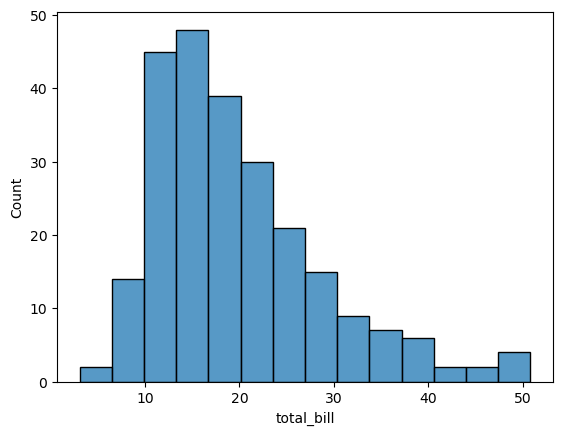

In [51]:
sns.histplot(df['total_bill'])

<AxesSubplot: ylabel='Count'>

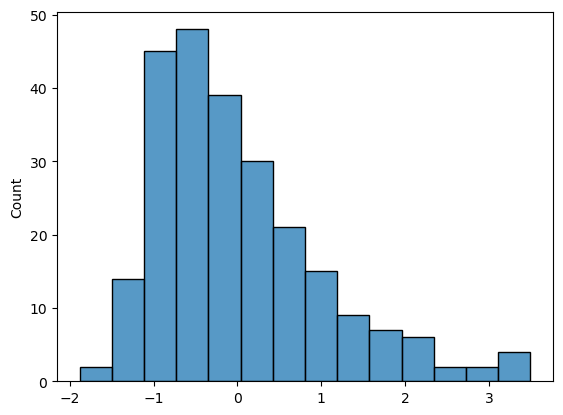

In [52]:
sns.histplot(normalized_data)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler

StandardScaler()

In [56]:
scaler.fit(df[['total_bill']])

StandardScaler()

In [57]:
scaler.transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [58]:
## Instead of writing two lines of code, we can do it writing in a short way
scaler.fit_transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [59]:
## We can do for more than 1 feature as well in below way:
import pandas as pd
pd.DataFrame(scaler.fit_transform(df[['total_bill', 'tip']]), columns=['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [29]:
# We can transform any new values that comes over there. Once we create a model, after that, with prediction, new data will come. So again, i have to do the feature scalling. And i have to do the feature scaling based on the data that i have already done. 
scaler.transform([[13,4]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

## 2. Normalization -- Min Max Scaler

In [60]:
df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
min_max=MinMaxScaler()

In [63]:
min_max.fit_transform(df[['distance', 'fare', 'tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [65]:
# Putting new data
min_max.transform([[1.6, 7.0, 2.15]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04359673, 0.04026846, 0.06475904]])

## 3. Unit Vector

In [66]:
from sklearn.preprocessing import normalize

In [68]:
pd.DataFrame(normalize(df[['distance', 'fare', 'tip']]))

,0,1,2
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000


## Feature Engineering (Data Encoding) (196)

1. Nominal/OHE Encoding- One Hot Encoding
2. Label and Ordinal Encoding
3. Target Guided Original Encoding

## 1. Nominal/OHE Encoding

One hot encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for ML algorithms. In this technique, each category is represented as a binary vector where each bit corresponds to a unique category. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it in one hot encoding as follows:

* 1. Red: [1,0,0]
* 2. Green: [0,1,0]
* 3. Blue: [0,0,1]

* Disadvantage:

1. If we have many categorical features, we should not use OHE, as it results on creating too many new features.
2. Sparce Matrix: Lets say we have 10 categorical features and we convert them to OHE. What will happen is, it will create a lot of 1's and 0's. This is called as sparce matrix. And whenever it leads to sparce matrix, it usally leads to overfitting. This is why we should not go for OHE if we have many categorical features.

In [76]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [77]:
## Create a simple dataframe
df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'green', 'red', 'blue']
})

In [78]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [79]:
## We create an instance of OHE
encoder=OneHotEncoder()

In [81]:
## perform fit and transform
encoded=encoder.fit_transform(df[['color']]).toarray()

In [84]:
import pandas as pd
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())  # get_feature_names_out() gets out the feature name

In [85]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [86]:
## Whenver we get new data
encoder.transform([['blue']]).toarray()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [87]:
pd.concat([df,encoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


## 2. Label & Ordinal Encoding

Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories. For example, if we have categorical variable "color" with three possible values (red, green, blue), we can represent it using label encoding as follows:

1. Red: 1
2. Green: 2
3. Blue: 3 

###Label Encoding

In [100]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [101]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

In [102]:
lbl_encoder.fit_transform(df[['color']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [104]:
lbl_encoder.transform([['red']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [105]:
lbl_encoder.transform([['blue']])

array([0])

In [106]:
lbl_encoder.transform([['green']])

array([1])

As we can see, 'red','green' and 'blue' are assigned value based on their alphabetic order. Since b comes first in alphabetic sequence, blue got the value of 0. g comes after b, so green got the value of 1 and red got 2. Machine may start thinking that, since red=2 got the higher rank, it might have the higher value compared to green or blue. To avoid this kind of scenario, we use the below method.

## Ordinal Encoding

It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values (high school, college, graduate, post-graduate), we can represent it using ordinal encoding as follows:

1. High school: 1
2. College: 2
3. Graduate: 3
4. Post-graduate: 4

In [112]:
## Ordinal Encoding
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [113]:
df = pd.DataFrame({
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})

In [114]:
## create an instance of ordinal encoder and then fit_transform
encoder=OrdinalEncoder(categories=[['small', 'medium', 'large']])

In [115]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [116]:
encoder.transform([['small']])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

## 3. Target Guided Ordinal Encoding
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [117]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [118]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [120]:
mean_price=df.groupby('city')['price'].mean().to_dict()

In [121]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [122]:
df['city_encoded']=df['city'].map(mean_price)
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [123]:
df[['price', 'city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0


## Feature Engineering (Covariance And Correlation) (199)

Lets say I have two variables with values x=2,4,6,8 and y = 3,5,7,9. Can we find out a relationship between x and y? Like, a relationship as in, if x is increasing, y is increasing, or, x is increasing then y is decreasing, or, when x is decreasing, y is increasing,or, when x is decreasing, y is also decreasing. x and y variables relation will have an impact on the output. This is what covariance and correlation is. 

# Interview Question: What is the difference between Variance and Covariance:
Variance is nothing but, the covariance of x itself. We are dealing with the spread of the data here. When we are dealing with 2 variables relation, we are dealing with covariance of two difference variables. 

In short, we are checking the variance of x variable itself in term of the definition of variance. When we are checking the variance of two variables, it is covariance. 

* Scenario 1: When x and y both increases,or x and y both decreases, we consider this as positive (+ve) covariance.
* Scenario 2: When x is increasing and y is decreasing, or, when x is decreasing and y is increasing, we consider this as negative (-ve) covariance.

- Advantage: We get the relationship between x and y eihter +ve or -ve
- Disadvantage: Covariance does not have specific limit value

To avoid this disadvantage, we specificly use:

- Pearson Correlation Coefficient: This sets the value between -1 to +1.

Here, 
1. The more the value towards +1 the more the correlated it is. (x, y)  
2. The more the value towards -1 the more -ve correlated it is (x,y)

- Spearman Rank Correlation: We rank the x=2,4,6,8 and y = 3,5,7,9 value. Once we rank, we get a dataset based on rank and use it to calculate the correlation. 

In [1]:
import seaborn as sns

In [4]:
df=sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [5]:
## Covariance
import numpy as np

In [6]:
df.cov()

/tmp/ipykernel_77/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [8]:
## Spearman Rank Correlation
df.corr(method='spearman')

/tmp/ipykernel_77/304108163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [9]:
## Pearson Correlation
df.corr(method='pearson')

/tmp/ipykernel_77/546256669.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


## ********** End of Feature Engineering ************* 